In [7]:
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [8]:
def tokenize_word(text):
    return word_tokenize(text)
def lemmatize(word):
    lemmatizer=WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

In [9]:
def preprocesstext(text):
    text = text.lower()
    words = tokenize_word(text)
    w = [word for word in words if not is_stop_word(word) and word != ',' and  word != '.' and word != ':']
    return w

def is_stop_word(word):
    stop_words=set(stopwords.words('english'))
    return word.lower() in stop_words

In [10]:
def calculatewordfreq(words):
    wordfreq = {}
    for word in words:
        wordfreq[word] = wordfreq.get(word,0) + 1
    return wordfreq

In [11]:
def createcloud(wordfreq, words, size=(800, 650)):
    cloud = Image.new("RGB", size, "black")
    img = ImageDraw.Draw(cloud)
    displayedwords = set()
    x = 50
    y = 50
    color = ["white", "red", "blue", "orange"]

    for word in words:
        l = wordfreq[word]
        if word not in displayedwords:
            
            fontsize = int(10 + 85 * l / 3)
            font = ImageFont.truetype("arial.ttf", fontsize)
            _, _, word_width, word_height = img.textbbox((0, 0), text=word, font=font)
            
            if x + word_width + 30 > size[0]:
                x = 40
                y += word_height + 23
            
            img.text((x + 30 + random.randint(0, 15), y + 15 + random.randint(0, 10)), word, fill=color[random.randint(0, 3)], font=font)
            x += word_width
            displayedwords.add(word)

    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

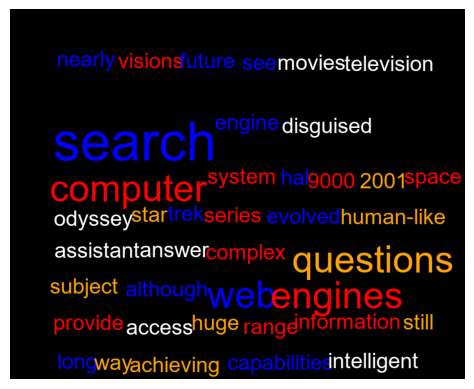

55


In [12]:
text = """
In nearly all visions of the future that we see in movies or on television, the search
engine, disguised as a computer system such as HAL 9000 in 2001: A Space
Odyssey or the Computer in the Star Trek series, has evolved into a human-like assistant that can answer complex questions about any subject. Although web search
engines provide access to a huge range of information, we are still a long way from
achieving the capabilities of these intelligent assistants. One obvious difference is
that queries to web search engines are generally formulated as a small number of
keywords, rather than as actual questions expressed in natural language.
"""
words = preprocesstext(text)
wordfreq = calculatewordfreq(words)
createcloud(wordfreq,words)
print(len(wordfreq))